# **Resumo (*Abstract*)**

Com a ascensão da internet e dos serviços de streaming, ferramentas como Netflix e Prime Videos estão presentes cada vez mais no cotidiano das pessoas. Em vista da grande quantidade de filmes e séries existentes, decidimos criar um algoritmo de Machine Learning capaz de sugerir obras com base nos gêneros, ano de lançamento, tempo de sessão e número de avaliações, possibilitando uma recomendação assertiva com base nos gostos pessoais do consumidor.

# **Referencial Teórico**

Como dito anteriormente, desenvolvemos um algoritmo para sugerir obras com base no gênero, ano de lançamento, tempo de sessão e número de avaliações. Utilizamos os dados disponíveis no IMDb (Internet Movie Database), que contém informações abrangentes sobre filmes, programas de TV, séries, curtas-metragens, documentários e outros conteúdos audiovisuais. É considerado uma das maiores e mais abrangentes fontes de informações sobre filmes e programas de TV do mundo.

Para nosso projeto utilizamos o K-vizinhos mais próximos, também conhecido como KNN (do inglês K-Nearest Neighbors), que é um algoritmo de aprendizado de máquina supervisionado utilizado para classificação e regressão.
O KNN tenta classificar cada amostra de um conjunto de dados avaliando sua distância em relação aos vizinhos mais próximos. Se os vizinhos mais próximos forem majoritariamente de uma classe, a amostra em questão será classificada nesta categoria. Podemos visualizar um exemplo, sendo K = 5:

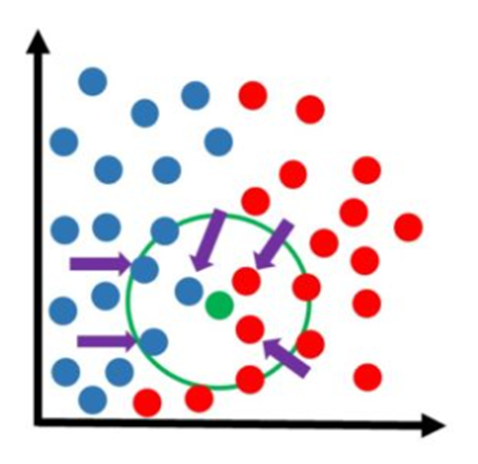

Dos 5 vizinhos mais próximos, 3 são azuis e 2 são vermelhos. Portanto a classe vencedora foi a azul. Essa amostra seria classificada nessa classe. Resultado:



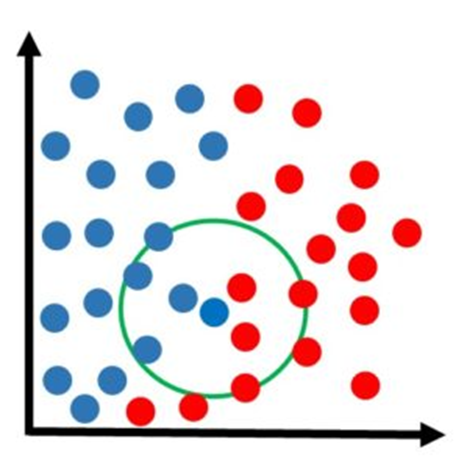


O valor de K, que representa o número de vizinhos considerados, é um parâmetro que deve ser definido pelo usuário. Uma escolha adequada de K é importante para o desempenho do algoritmo e pode variar de acordo com o conjunto de dados e o problema em questão. Quando o k é pequeno, a classificação fica mais sensível a regiões bem próximas (podendo ocorrer o problema de overfitting). Com k grande, a classificação fica menos sujeita a ruídos pode ser considerada mais robusta, porém se k for grande demais, pode ser que haja o problema de underfitting.

O KNN pode ser aplicado em uma variedade de problemas de aprendizado de máquina, como por exemplo, a detecção de anomalias (o KNN pode ser utilizado para identificar anomalias em dados, onde pontos que se afastam significativamente do restante dos dados são considerados anômalos), a recomendação de itens (o KNN pode ser aplicado em sistemas de recomendação, onde os itens são recomendados aos usuários com base nas preferências de outros usuários semelhantes), previsão de valores numéricos (prever um valor numérico com base em características do dado de entrada), etc.


# **Conceitos Chave**


## 1. *Vizinhos mais próximos (Nearest Neighbors)*
O KNN baseia-se na ideia de que instâncias de dados semelhantes tendem a ser classificadas da mesma forma. Ele calcula a distância entre os pontos de dados e seleciona os K vizinhos mais próximos ao ponto de consulta (a instância a ser classificada). Esses vizinhos são usados para determinar a classe da instância desconhecida.

## 2. *Valor de K*
O valor de K é o parâmetro crítico no algoritmo KNN. Ele determina o número de vizinhos mais próximos que serão considerados na classificação. O valor de K deve ser escolhido cuidadosamente, pois um valor muito pequeno pode levar a uma classificação sensível a ruídos, enquanto um valor muito grande pode levar a uma classificação incorreta em regiões de sobreposição das classes.

# **Exemplo de Aplicação**


Atualmente, serviços de streaming como Netflix e Prime Videos são altamente populares e uma das características destas plataformas são a grande quantidade de obras disponíveis para consumo, todavia, nem sempre os usuários são capazes de encontrar as séries/filmes ideais, para resolver este impasse será possível utilizar nosso algoritmo de Machine Learning, que recomenderá obras semelhantes ao que o usuário está buscando.
Apesar de ferramentas de busca e filtragem já existerem nestas plataformas, ainda sim, a busca se limita a filtrar por gênero ou nome da obra, sendo assim, introduzimos a possíbilidade de fazer a busca com base no número de avaliações, ano de lançamento e duração da sessão.

# **Código**

 Em relação ao código, foram utilizadas algumas bibliotecas, como ***pandas*** e ***scikit-learn*** para auxiliar as operações com dataframe, manipulação de dados, aplicação do algoritmo KNN e métricas de análise.

In [ ]:
import pandas as pd
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

Para ser utilizado no algoritmo, importamos a base de dados no formato .xlsx em um repositório online no *GitHub*, com o número de linhas podendo ser alterado pelo usuário.

In [ ]:
# Ler o arquivo Excel e criar o DataFrame
df = pd.read_excel('https://github.com/Karluss/projeto-IA/raw/main/Dados.xlsx', nrows=1000)

# Separar variáveis interessantes para a predição
x = df.drop(columns=["tconst","titleType","genres","originalTitle"])

Também fez-se necessário o tratamento da coluna de gêneros (*genres*), pois sua estrutura estava originalmente unindo mais de um tema por valor. Então, criamos um algoritmo para reestruturá-la em várias colunas, cada uma com um gênero, e seus possíveis valores: 1 (caso pertença ao filme) e 0 (caso não pertença).

In [ ]:
# Criar um DataFrame vazio para armazenar as colunas de gênero
df_genres = pd.DataFrame()

# Iterar sobre cada linha do DataFrame
for _, row in df.iterrows():
    genres = row['genres'].split(',')

    # Criar uma coluna para cada gênero
    genres_series = pd.Series([1] * len(genres), index=genres)
    df_genres = pd.concat([df_genres, genres_series.to_frame().T], ignore_index=True)

# Preencher valores faltantes com 0
df_genres = df_genres.fillna(0)

# Reordenar as colunas no DataFrame final
df_genres = df_genres[sorted(df_genres.columns.tolist()[:-1])]

# Transformar os valores em inteiros
df_genres = df_genres.astype(int)

# Remover hífem da coluna Sci-Fi
df_genres.rename({'Sci-Fi': 'SciFi'}, axis=1, inplace=True)

# Unir o dataframe de gêneros ao dataframe x
x = x.join(df_genres)

Foram feitos o tratamento, transformação, normalização e o modelo KNN dos dados, e após isso, o treinamento do modelo. Implementamos uma função “recommend_movies”, que recomenda os filmes com base nas características fornecidas.

In [ ]:
# Selecionar todas as colunas como features relevantes
features = ['isAdult', 'startYear', 'runtimeMinutes', 'numVotes', 'Action', 'Adult', 'Adventure', 'Animation', 'Comedy', 'Crime',
            'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
            'Music', 'Musical', 'Mystery', 'Romance', 'SciFi', 'Short', 'Sport',
            'Thriller', 'War', 'Western']

# Normalizar as features relevantes
scaler = StandardScaler()
normalized_data = scaler.fit_transform(x[features])

# Criar o modelo KNN
model = NearestNeighbors(metric='cosine', algorithm='brute')

# Treinar o modelo com os dados normalizados
model.fit(normalized_data)

# Função para recomendar filmes com base nas características fornecidas
def recommend_movies(movie_features, k=20):
    normalized_movie = scaler.transform([movie_features])
    _, indices = model.kneighbors(normalized_movie, n_neighbors=k+1)
    recommended_movies = x.iloc[indices[0][1:]]['primaryTitle']
    return recommended_movies

Dessa forma, criamos um dataframe para o usuário alterar os dados de acordo com sua preferência, por exemplo, temos o gênero aventura com valor 0, se quisermos selecionar os filmes com esse gênero, basta alterarmos para valor 1, com exceção do atributo “startYear, “runtimeMinutes” e “numVotes”, que são atributos numéricos não-binários. Finalmente, chamamos a função, recebendo esse dataframe como atributo e retornando os 20 filmes que mais se enquadram aos parâmetros fornecidos.

In [ ]:
# Criar um novo dado de entrada
new_movie = pd.DataFrame({'isAdult': [0], 'startYear': 2000, 'runtimeMinutes': 70, 'numVotes': 1000,
                        'Action': 0, 'Adult': 0, 'Adventure': 0, 'Animation': 0, 'Comedy': 0, 'Crime': 0,
                        'Documentary': 0, 'Drama': 0, 'Family': 0, 'Fantasy': 0, 'History': 0, 'Horror': 0,
                        'Music': 0, 'Musical': 0, 'Mystery': 0, 'Romance': 0, 'SciFi': 0, 'Short': 0, 'Sport': 1,
                        'Thriller': 0, 'War': 0, 'Western': 0})

# Fazer a recomendação de filmes similares
recommended_movies = recommend_movies(new_movie.values[0])
print('Filmes recomendados:')
print(recommended_movies)


Filmes recomendados:
990                                     Ready to Rumble
439                                     A Shot at Glory
368                                      Price of Glory
405                                    The Replacements
787                                 Remember the Titans
634                                         Bring It On
548                            Trapped in a Purple Haze
521                                   Love & Basketball
63     Siestas & Olas: A Surfing Journey Through Mexico
469                          MVP: Most Valuable Primate
999                                   Alley Cats Strike
94                           The Legend of Bagger Vance
901                                             Control
573                             The Prince's Manuscript
358                                               Beast
706                                          Talk to Me
840                                     Brutally Normal
428                        

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# **Ideias de Projeto de Aplicação**

Uma possível aplicação para nosso projeto seria uma plataforma de recomendação de filmes ou seriados, no qual os usuários poderão inserir quais características desejam encontrar na obra e então a plataforma geraria uma lista de recomendação, por exemplo:

Utilizando as seguintes entradas:

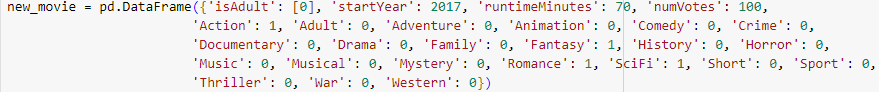

A plataforma retornaria as seguintes obras:

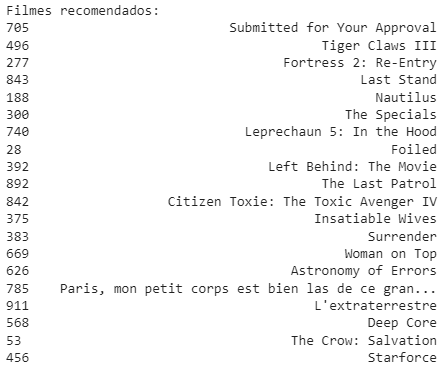


# **Referências**

1.6. Nearest Neighbors. Disponível em: https://scikit-learn.org/stable/modules/neighbors.html. Acesso em: 2 de jun. 2023.

IMDB Non-Commercial Datasets. Disponível em: https://developer.imdb.com/non-commercial-datasets/#imdb-non-commercial-datasets. Acesso em: 1 jun. 2023.

Inteligência Artificial - 1o Semestre 2023 (7N 7G). Disponível em: https://github.com/Rogerio-mack/IA_2023S1/tree/main#readme. Acesso em: 1 jun. 2023.

K-Nearest Neighbor(KNN) Algorithm. Disponível em: https://www.geeksforgeeks.org/k-nearest-neighbours/. Acesso em 1 jun. 2023.

O QUE é e como funciona o algoritmo KNN?. Disponível em: https://didatica.tech/o-que-e-e-como-funciona-o-algoritmo-knn/#:~:text=O%20KNN%20(K%2Dnearest%20neighbors%2C%20ou%20%E2%80%9CK%2D,mais%20f%C3%A1ceis%20de%20se%20compreender. Acesso em: 1 jun. 2023.




# **Conclusão**

Em conclusão, este trabalho explorou a aplicação do algoritmo K-Nearest Neighbors (KNN) para recomendar filmes com base em diferentes critérios, como gênero, ano, tempo de duração e número de avaliações. O KNN se mostrou uma abordagem eficaz para criar um sistema de recomendação personalizado, permitindo aos usuários descobrir filmes que se alinham com suas preferências individuais.

Ao longo deste trabalho, utilizamos um conjunto de dados contendo informações sobre filmes, incluindo seus atributos relevantes, e aplicamos o algoritmo KNN para encontrar os filmes mais semelhantes aos gostos e preferências do usuário. Com base nos atributos selecionados, o KNN foi capaz de calcular a distância entre os filmes e identificar aqueles que têm características mais próximas às preferências do usuário.

Uma das principais vantagens do KNN é sua simplicidade de implementação e facilidade de compreensão. Além disso, o algoritmo não faz suposições sobre a distribuição dos dados, o que o torna adequado para lidar com diferentes tipos de filmes e preferências do usuário.

Embora o KNN tenha se mostrado eficaz na recomendação de filmes com base nos atributos selecionados, é importante mencionar que existem outros algoritmos e técnicas mais avançadas que podem ser explorados no futuro. Além disso, a inclusão de outros atributos, como diretor, elenco ou sinopse, pode enriquecer ainda mais o sistema de recomendação e torná-lo mais preciso, porém, encontramos um empecilho devido ao LGPD, que limitou o acesso a esses dados.

No geral, a aplicação do algoritmo KNN para recomendar filmes com base em gênero, ano, tempo de duração e número de avaliações mostrou resultados promissores. Através dessa abordagem, os usuários podem descobrir filmes relevantes que correspondam às suas preferências individuais, tornando a experiência de assistir filmes mais satisfatória e personalizada.


---